**Dataset**

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL for the data
base_url = "https://baseballsavant.mlb.com/leaderboard/custom?year=2024&type=batter&filter=&min=q&selections=pa%2Ck_percent%2Cbb_percent%2Cwoba%2Cxwoba%2Csweet_spot_percent%2Cbarrel_batted_rate%2Chard_hit_percent%2Cavg_best_speed%2Cavg_hyper_speed%2Cwhiff_percent%2Cswing_percent&chart=false&x=pa&y=pa&r=no&chartType=beeswarm&sort=xwoba&sortDir=desc"

# Define parameters for the years you are interested in
years = [2020, 2021, 2022, 2023, 2024]

# Placeholder for collected data
all_data = []

for year in years:
    # Construct the URL with the current year
    url = f"{base_url}?year={2024}"
    
    # Make the HTTP request to fetch the content
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the data table, assuming it's the first 'table' element
        table = soup.find('table')
        
        # Extract data using pandas
        if table:
            df = pd.read_html(str(table))[0]  # Read the table to a dataframe
            df['Year'] = year  # Add a year column for clarity
            all_data.append(df)
    else:
        print(f"Failed to retrieve data for {year}")

all_data

[]

In [2]:
import pandas as pd
#read the csv
ball = pd.read_csv("C:\\Users\\eoing\\Downloads\\stats (1).csv") 
ball_info = ball.info()
#display the columns and information about the data
ball_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  723 non-null    object 
 1   player_id              723 non-null    int64  
 2   year                   723 non-null    int64  
 3   player_age             723 non-null    int64  
 4   ab                     723 non-null    int64  
 5   pa                     723 non-null    int64  
 6   hit                    723 non-null    int64  
 7   single                 723 non-null    int64  
 8   double                 723 non-null    int64  
 9   triple                 723 non-null    int64  
 10  home_run               723 non-null    int64  
 11  strikeout              723 non-null    int64  
 12  walk                   723 non-null    int64  
 13  k_percent              723 non-null    float64
 14  bb_percent             723 non-null    float64
 15  battin

In [4]:
#displays the first five rows of the dataset
ball_head = ball.head()
ball_head

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,on_base_plus_slg,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Cabrera, Miguel",408234,2020,37,204,231,51,37,4,0,...,0.746,0.323,0.379,36.8,9.7,49.7,102.655113,96.026886,31.6,47.7
1,"Cruz Jr., Nelson",443558,2020,39,185,214,56,34,6,0,...,0.992,0.411,0.383,39.4,15.0,47.2,102.723680,95.933078,34.2,47.6
2,"Peralta, David",444482,2020,32,203,218,61,45,10,1,...,0.772,0.333,0.299,29.4,5.0,36.3,100.556637,94.354591,21.1,46.6
3,"Longoria, Evan",446334,2020,34,193,209,49,31,10,1,...,0.722,0.308,0.364,29.9,11.5,45.2,101.530260,95.520896,21.0,45.0
4,"Cabrera, Asdrúbal",452678,2020,34,190,213,46,26,9,3,...,0.752,0.319,0.317,30.5,6.5,38.3,97.982869,93.323023,20.5,46.1


In [28]:
#check for missing values 
missing_values = ball.isnull().sum()
missing_values

last_name, first_name    0
player_id                0
year                     0
player_age               0
ab                       0
pa                       0
hit                      0
single                   0
double                   0
triple                   0
home_run                 0
strikeout                0
walk                     0
k_percent                0
bb_percent               0
batting_avg              0
slg_percent              0
on_base_percent          0
on_base_plus_slg         0
woba                     0
xwoba                    0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
whiff_percent            0
swing_percent            0
dtype: int64

In [29]:
#create a group summary by displaying specific selected columns and players 
summary = ball.groupby(['last_name, first_name', 'year']).agg({
    'hit': 'sum',
    'home_run': 'sum',
    'batting_avg': 'mean',
    'on_base_percent': 'mean'
})
summary

hit  home_run  batting_avg  on_base_percent
last_name, first_name year                                             
Abrams, CJ            2023  138        18        0.245            0.300
                      2024   28         6        0.301            0.369
Abreu, José           2020   76        19        0.317            0.370
                      2021  148        30        0.261            0.351
                      2022  183        15        0.304            0.378
...                         ...       ...          ...              ...
Yelich, Christian     2020   41        12        0.205            0.356
                      2022  145        14        0.252            0.355
                      2023  153        19        0.278            0.370
Yoshida, Masataka     2023  155        15        0.289            0.338
                      2024   21         2        0.269            0.345

[723 rows x 4 columns]

In [30]:
# Shows summary statistics of each column 
summary= ball.describe()
summary

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,on_base_plus_slg,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,614269.094053,2022.121715,28.219917,356.066390,400.463347,93.114799,58.445367,18.698479,1.528354,14.442600,...,0.768661,0.333552,0.334311,34.118396,8.755878,40.949516,100.195197,94.410709,24.416044,47.217981
std,62334.480294,1.471469,3.506234,204.164444,229.149432,55.681990,36.112908,12.105736,1.824035,11.276945,...,0.109559,0.041886,0.039680,4.619845,4.352842,7.865001,2.470505,1.469160,6.462484,4.996656
min,408234.000000,2020.000000,20.000000,73.000000,85.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.423000,0.198000,0.231000,18.700000,0.000000,14.900000,92.661183,90.514600,7.100000,33.100000
25%,577178.500000,2021.000000,26.000000,115.500000,131.000000,35.000000,22.000000,7.000000,0.000000,5.000000,...,0.706000,0.309000,0.307500,31.300000,5.550000,36.350000,98.693453,93.477177,20.000000,43.800000
50%,630105.000000,2022.000000,28.000000,464.000000,523.000000,111.000000,62.000000,20.000000,1.000000,12.000000,...,0.771000,0.334000,0.331000,34.000000,8.400000,41.100000,100.196378,94.354591,24.200000,47.300000
75%,664702.000000,2024.000000,30.500000,537.500000,603.000000,140.500000,89.000000,29.000000,2.000000,22.000000,...,0.828500,0.356500,0.356000,36.900000,11.400000,46.000000,101.661009,95.260199,28.950000,50.400000
max,808982.000000,2024.000000,41.000000,670.000000,753.000000,217.000000,160.000000,59.000000,11.000000,62.000000,...,1.185000,0.496000,0.498000,50.000000,26.500000,62.500000,108.657831,99.263674,45.800000,62.900000


**Google Trends**

In [42]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Fantasy Baseball"] 
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
print(interest_over_time_df.head())
# Interest by Region
interest_by_region_df = pytrends.interest_by_region()
print(interest_by_region_df.head())


            Fantasy Baseball  isPartial
date                                   
2019-04-28                36      False
2019-05-05                37      False
2019-05-12                37      False
2019-05-19                36      False
2019-05-26                35      False
            Fantasy Baseball
geoName                     
Alabama                   31
Alaska                    33
Arizona                   47
Arkansas                  28
California                51


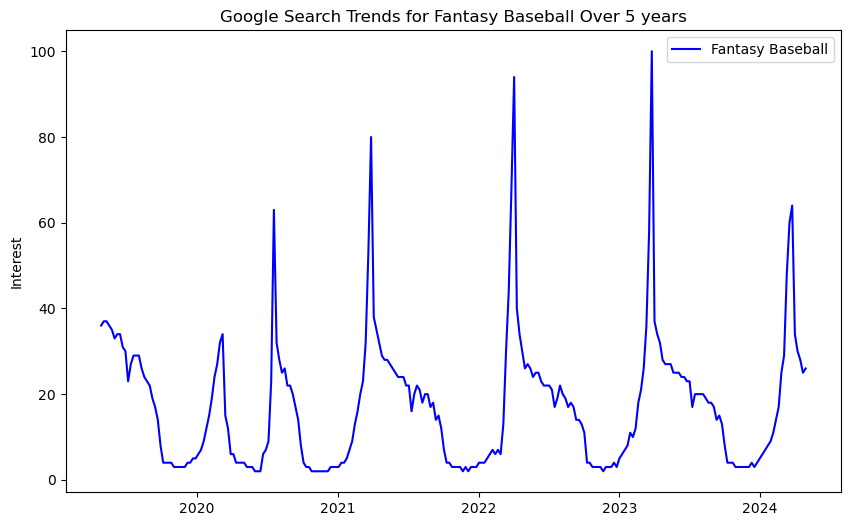

In [44]:
import matplotlib.pyplot as plt

# Assuming 'interest_over_time_df' is already loaded with Google Trends data
plt.figure(figsize=(10, 6))  # Set the size of the graph
plt.plot(interest_over_time_df.index, interest_over_time_df['Fantasy Baseball'], label='Fantasy Baseball', color='blue')
plt.title('Google Search Trends for Fantasy Baseball Over 5 years')  # Title of the graph
plt.ylabel('Interest') 
plt.legend()  
plt.show()

In [32]:
# Keywords for different fantasy baseball apps
kw_list = ["ESPN Fantasy Baseball", "Yahoo Fantasy Baseball", "CBS Fantasy Baseball", "Fantrax"]
pytrends.build_payload(kw_list, timeframe='today 5-y')
# Interest over time
interest_over_time_df = pytrends.interest_over_time()
print(interest_over_time_df)


            ESPN Fantasy Baseball  Yahoo Fantasy Baseball  \
date                                                        
2019-04-28                     29                      65   
2019-05-05                     31                      63   
2019-05-12                     30                      63   
2019-05-19                     31                      56   
2019-05-26                     29                      64   
...                           ...                     ...   
2024-03-31                     21                      41   
2024-04-07                     14                      46   
2024-04-14                     14                      40   
2024-04-21                     11                      39   
2024-04-28                     12                      38   

            CBS Fantasy Baseball  Fantrax  isPartial  
date                                                  
2019-04-28                    10        8      False  
2019-05-05                    10        8

**Visualizations**

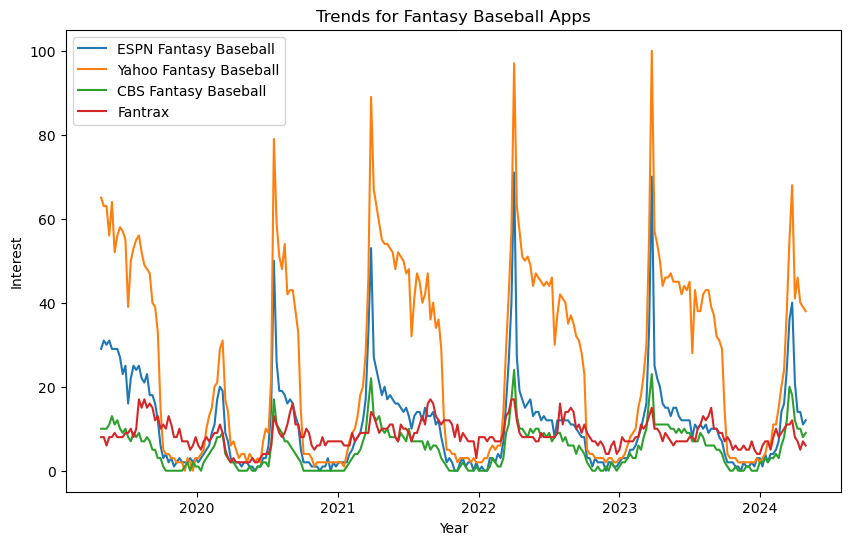

In [33]:
# Plotting the interest of Different Fantasy baseball apps 
plt.figure(figsize=(10, 6))
for keyword in kw_list:
    plt.plot(interest_over_time_df.index, interest_over_time_df[keyword], label=keyword)

plt.title('Trends for Fantasy Baseball Apps')
plt.xlabel('Year')
plt.ylabel('Interest')
plt.legend()
plt.show()

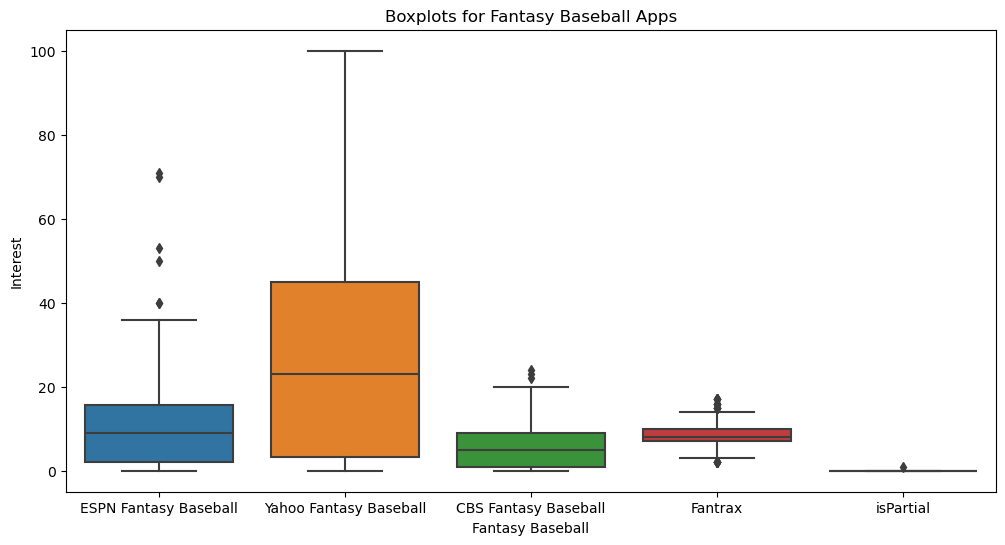

In [34]:
import seaborn as sns
# Boxplots to show the different fantasy apps and there varying averages
plt.figure(figsize=(12, 6))
sns.boxplot(data=interest_over_time_df)
plt.title( 'Boxplots for Fantasy Baseball Apps')
plt.ylabel('Interest')
plt.xlabel('Fantasy Baseball')
plt.show()

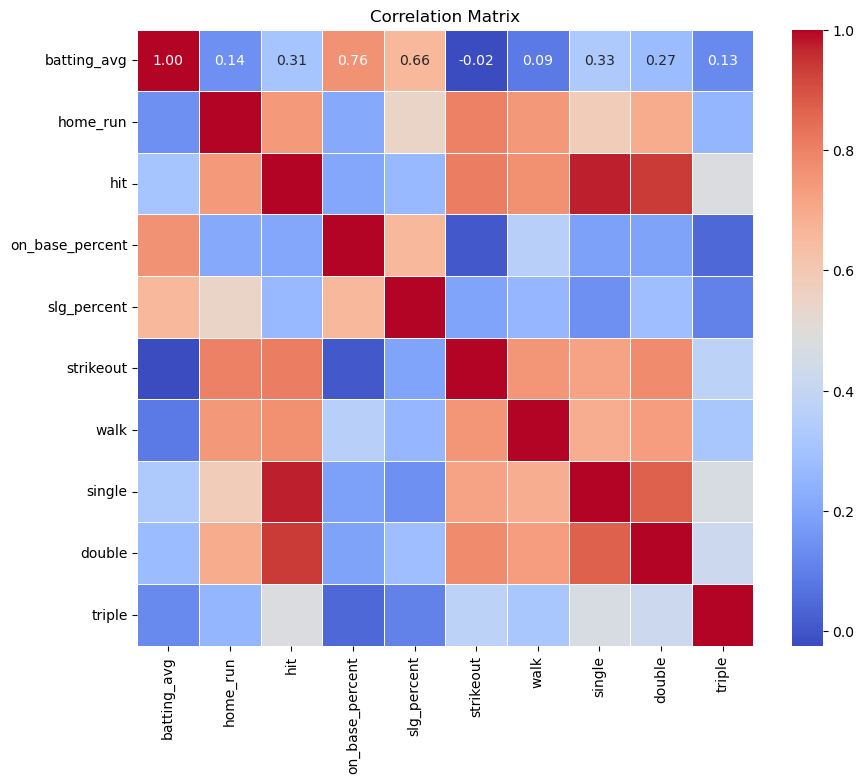

In [35]:
#Columns for correlation analysis
columns = ball[['batting_avg', 'home_run', 'hit', 'on_base_percent', 'slg_percent', 'strikeout', 'walk', 'single', 'double', 'triple']]
correlation_matrix = columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()


**Models**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume 'data' is your DataFrame
X = ball[['ab', 'hit', 'home_run', 'strikeout', 'walk', 'single']]  # Prediction variables
y = ball['batting_avg'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score


# R-squared 
r_squared = r2_score(y_test, predictions)

# == Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.0004977768812271636
R-squared: 0.5945255061263812
Mean Absolute Error: 0.015060944734466822
Mean Squared Error: 0.0004977768812271636
